In [ ]:
import numpy as np
from numpy import linalg
import random 
import matplotlib.pyplot as plt
import math

random.seed(10)

In [ ]:
## Defining the function
def matrix_scaling(A,r,c, tolerance = 10**(-8)):
    (m,n) = np.shape(A)
    one_m = np.zeros(m) + 1
    one_n = np.zeros(n) + 1
    row_sum = A@one_n
    column_sum = A.T@one_m
    
    x_scale = one_m
    y_scale = one_n
    k = 1
    
    while max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)) > tolerance:
        k = k+1
        if k % 2 == 0:
            x = r/row_sum
            x_scale = x_scale*x
            A = np.diag(x)@A
        else:
            y = c/column_sum
            y_scale = y_scale*y
            A = A@np.diag(y)
                 
        #print(max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)))
        row_sum = A@one_n
        column_sum = A.T@one_m
    
    return x_scale, y_scale, A

def normalise(x,y):
    n_x = np.linalg.norm(x,1)
    n_y = np.linalg.norm(y,1)
    alpha = np.sqrt(n_x/n_y)
    
    return x/alpha, y*alpha

def dist(x,y,x_avg,y_avg):
    x_max = np.max(np.abs(x/x_avg - 1))
    y_max = np.max(np.abs(y/y_avg - 1))
    return max(x_max, y_max)


In [ ]:
x = np.array([1,2,3,4])
y = np.array([6,7])
x_avg = np.array([1,1,1,1])
y_avg = np.array([6,5])

x_max = np.max(np.abs(x/x_avg - 1))
y_max = np.max(np.abs(y/y_avg - 1))
max(x_max, y_max)

dist(np.array([1,2,3,4]),np.array([6,7]),np.array([1,1,1,1]),np.array([6,5]))

3.0

In [ ]:
#Sampling from Uniform [1,2] distribution

m = 50 #size of matrix
n = 1000 # #-of samples

sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,1000):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,1000):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
avg = 1.5
mean = np.zeros((m,m))+avg
mean_scaled = 1/m*(mean)
for i in range(0,1000):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,1000):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,1000):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]

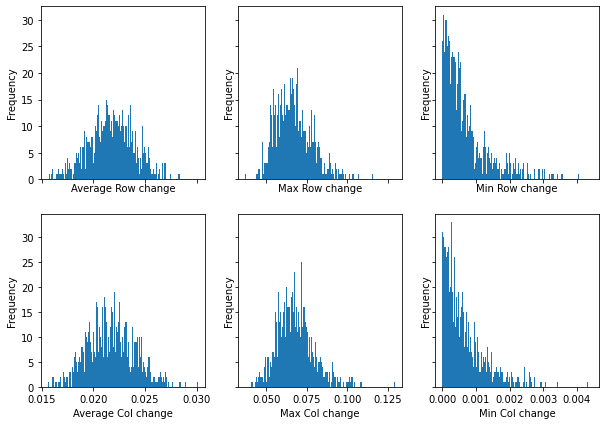

In [ ]:
#Approximate scaling of matrix by scaling factors of the mean

norm = []
avg = 1.5
mean = np.zeros((m,m))+avg
x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()


In [ ]:
#Sampling from Uniform [1,1+2 sqrt(6)] distribution

m = 50 #size of matrix
n = 1000 # #-of samples

sample = np.random.uniform(low = 1.0, high=2*(6)**0.5, size =(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,1000):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,1000):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
avg = 1 + (6)**0.5
mean = np.zeros((m,m))+avg
mean_scaled = 1/m*(mean)
for i in range(0,1000):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,1000):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,1000):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]

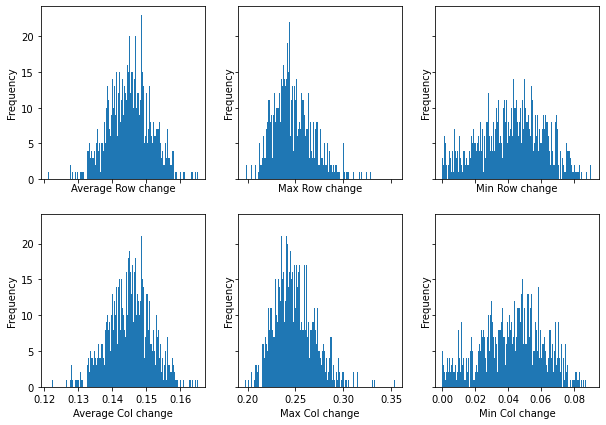

In [ ]:
#Approximate scaling of matrix by scaling factors of the mean

norm = []
avg = 1 + (6)**0.5
mean = np.zeros((m,m))+avg
x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()


In [ ]:
#Sampling from Uni [1,2] distribution

m = 100 #size of matrix
n = 1000 # #-of samples

sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,n):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,n):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
mean = np.zeros((m,m))+avg
mean_scaled = 1/m*(np.zeros((m,m))+avg)
for i in range(0,n):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,n):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,n):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]

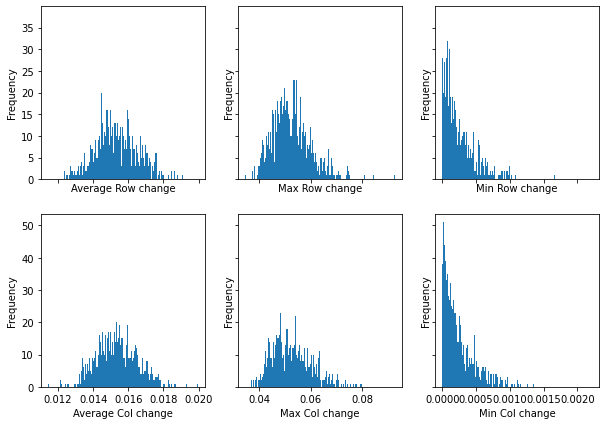

In [ ]:
#Approximate scaling of matrix by scaling factors of the mean

x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()

In [ ]:
delta = []
for j in range(20,220,20):
    print(j)
    m = j #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r
        
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]


20
40
60
80
100
120
140
160
180
200


In [ ]:
for i in range(0,np.shape(np.arange(20,220,20))[0]):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
delta

[0.11763419609897507,
 0.09000508387129544,
 0.07725285814182073,
 0.06751983022461212,
 0.062108448865365866,
 0.058139673235718406,
 0.054546005064175486,
 0.051726945810653915,
 0.04840939927094614,
 0.04719709273186381]

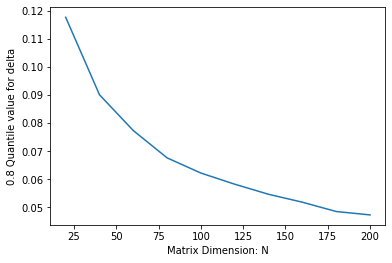

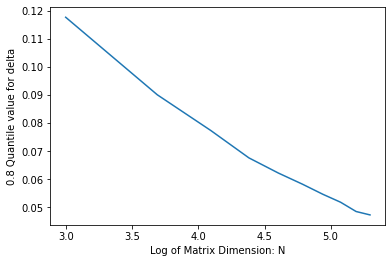

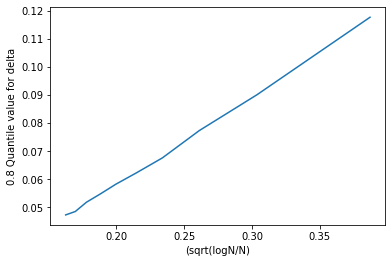

In [ ]:
x_plt = np.arange(20,220,20)
y_plt = delta

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

In [ ]:
####Dependence on n of Bounds on Scaling Factors: Fixing Probability ######

## Bounds at 0.8 probability level: We already have estimates for delta

n_val = np.arange(20,220,20)
delta_val = delta

bound = []

for j in range(0,np.shape(n_val)[0]):
    print(j)
    m = n_val[j] #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
        
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val[j]:
            maxi = max(maxi, dist(x,y,x_mean,y_mean))

    bound = bound + [maxi]

bound

0
1
2
3
4
5
6
7
8
9


In [ ]:
x_plt = np.arange(20,220,20)
y_plt = bound

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("Bounds")
plt.show()

In [ ]:
########### Fixing Delta: Bounds and the associated Probability ##########

delta_val = 0.1

n_val = np.arange(20,220,20)

prob = []
bound = []

for j in range(0,np.shape(n_val)[0]):
    print(j)
    m = n_val[j] #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
        
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = 0
    p = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val: #Fixed value
            maxi = max(maxi, dist(x,y,x_mean,y_mean))
            p = p+1

    bound = bound + [maxi]
    prob = prob + [p]
bound

0
1
2
3
4
5
6
7
8
9


[0.1173717901807636,
 0.11307745322704021,
 0.11068180372734782,
 0.0999716662681831,
 0.09927328396623536,
 0.09124795073364655,
 0.07374189061483372,
 0.07539694872259872,
 0.07703267286054749,
 0.06705763450133384]

In [ ]:
#Theoretical Bound:

print((1+2**4.5)*0.10) 

2.362741699796952


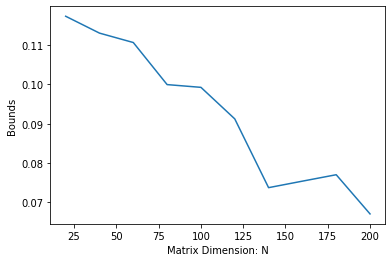

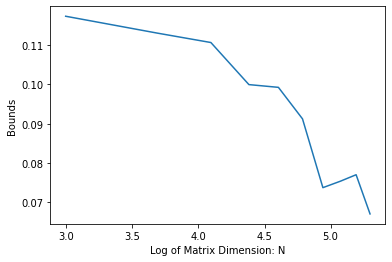

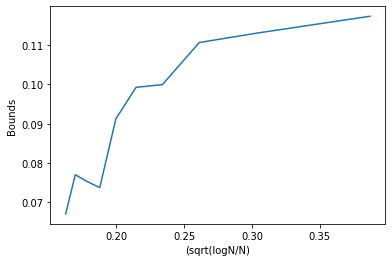

In [ ]:
x_plt = np.arange(20,220,20)
y_plt = bound

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("Bounds")
plt.show()

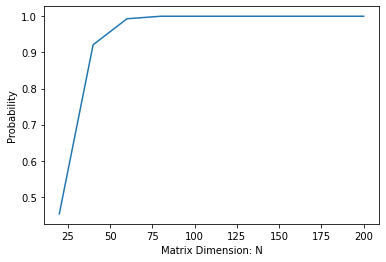

In [ ]:
x_plt = np.arange(20,220,20)
y_plt = np.array(prob)/n

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Probability")
plt.show()


In [ ]:
np.array(prob)/1000

array([0.453, 0.921, 0.993, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [ ]:
########## Analysing dependance on a #####################################

a_val = [1.5,1.3,1.1,0.9,0.7,0.5,0.3,0.1]
delta_val = 0.1

bound = []
prob = []

for j in range(0,np.shape(a_val)[0]):
    print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
    
    avg = (a_val[j] + 2)/2
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = -1
    p = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val:
            maxi = max(maxi, dist(x,y,x_mean,y_mean))
            p = p+1

    bound = bound + [maxi]
    prob = prob + [p]

bound

0
1
2
3
4
5
6
7


[0.05386710936389494,
 0.07327372413745725,
 0.10455311971581205,
 0.11114406268256682,
 0.11658681166257101,
 0.11183963906496852,
 -1,
 -1]

In [ ]:
np.array(prob)/n

array([1.   , 1.   , 0.999, 0.889, 0.337, 0.01 , 0.   , 0.   ])

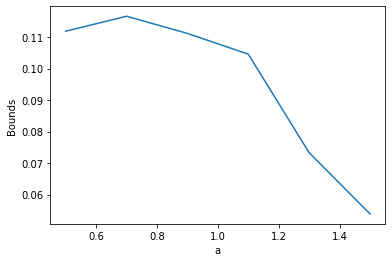

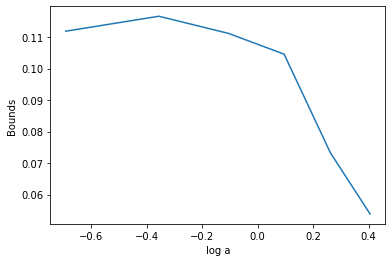

In [ ]:
x_plt = [1.5,1.3,1.1,0.9,0.7,0.5]
y_plt = bound[:6]

plt.plot(x_plt, y_plt)
plt.xlabel("a")
plt.ylabel("Bounds")
plt.show()


plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("log a")
plt.ylabel("Bounds")
plt.show()

In [ ]:
##### Distribution of delta as a function of a ###

prob = []
delta_val = 0.1

a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

bound = []
prob = []

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r

    avg = (a_val[j] + 2)/2  
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        if np.maximum(np.max(row_sum_change), np.max(col_sum_change)) <= delta_val:
          p = p+1
    prob = prob + [p]
    print(j,p)


0 1000
1 1000
2 1000
3 1000
4 998
5 980
6 879
7 659
8 360
9 106
10 16
11 0
12 0
13 0
14 0


In [ ]:
####### Plotting minimum and maximum values as a function of a

prob = []
min_scal = []
max_scal = []

print("a_val, min scaling.  , max scaling.   , 0.8 quantile") 
a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples
    b = 2

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r
    
    avg = (a_val[j]+b)/2
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    min_scal= min_scal + [np.min(delta_vals)]
    max_scal= max_scal + [np.max(delta_vals)]
    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]
    hoff = 1 - 4*m*math.exp(-1*(0.6**2)*m*(a_val[j]**4)/(2*(b**2)*(b - a_val[j])**2))

    print(a_val[j],np.min(delta_vals),np.max(delta_vals), np.quantile(delta_vals, 0.8), hoff)


a_val, min scaling.  , max scaling.   , 0.8 quantile
1.5 0.021865267202815453 0.05747644257905371 0.03494932840364939 1.0
1.4 0.026999514176086037 0.06027933276374564 0.0435704246507338 0.9999999925248574
1.3 0.03149909836466991 0.07541271643756753 0.052735177971579145 0.9995969409704408
1.2 0.039107465086322124 0.09467821529224985 0.06196101220828822 0.8635343894487244
1.1 0.043797701344890805 0.09784226173179111 0.07154221380861911 -2.4259298437812205
1.0 0.05027791970712259 0.14314551166883138 0.08248142955374313 -20.079844912372867
0.9 0.055362177487153996 0.13920040953587143 0.094741320017113 -58.04481343803819
0.8 0.06613495549221104 0.15011015220663082 0.10695426100352606 -104.45848480860971
0.7 0.07087072583152954 0.1743958128538009 0.11983707290950163 -144.27922833010564
0.6 0.08037620604471596 0.1952060539669065 0.13372023480558365 -171.35251001700638
0.5 0.08498654009280404 0.20710500204340865 0.1488636920451512 -186.88261256269516
0.4 0.09870616284394695 0.247624032008269 0

In [ ]:
# Keeping b/a fixed

prob = []
min_scal = []
max_scal = []

print("a_val, min scaling.  , max scaling.   , 0.8 quantile") 
a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0*a_val[j], size =(m,m,n))
    r = np.zeros(m)+1
    c = r
    
    avg = (a_val[j])*1.5
    mean = np.zeros((m,m))+avg
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    min_scal= min_scal + [np.min(delta_vals)]
    max_scal= max_scal + [np.max(delta_vals)]
    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]

    print(a_val[j],np.min(delta_vals),np.max(delta_vals), np.quantile(delta_vals, 0.8))



a_val, min scaling.  , max scaling.   , 0.8 quantile
1.5 0.050530984676532276 0.11274106529688144 0.08345740592235394
1.4 0.04938320558263254 0.11206901518389767 0.08154370024708378
1.3 0.048562886013846285 0.11539123952893604 0.08235062835638884
1.2 0.049050622911994024 0.13252281834866275 0.08210553899504905
1.1 0.04825802517474265 0.1237979421633284 0.08309379584748802
1.0 0.05078872339545448 0.12196993830625313 0.08400379484375597
0.9 0.050983371441992276 0.11988541848993761 0.08186775635724257
0.8 0.050040252328244605 0.11495603505534802 0.08268689173984227
0.7 0.05192923039680708 0.1305389168846287 0.08441919921008637
0.6 0.04745686247960368 0.1301233619412525 0.08257953501550212
0.5 0.0468919719625176 0.12137214746123881 0.0828805668432111
0.4 0.04737805387065075 0.11182590896451017 0.0818212111656655
0.3 0.049620839579706866 0.11524014797075588 0.08282074875482369
0.2 0.04916344595721722 0.11563400761273157 0.08281522427751106
0.1 0.05087515973891166 0.12059394572227888 0.08308

In [ ]:
######### Analysing dependance on min a ##################################

## Analysing Dependance on variance:



